In [51]:
import glob
import os

%load_ext lab_black

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [52]:
samples = sorted(
    list(
        set(
            [
                x.split("/")[-1].split(".")[0]
                for x in sorted(
                    glob.glob(
                        "../fixedcells_3_cistopic_consensus/downstream_analysis/DARs/*/*"
                    )
                )
            ]
        )
    )
)
samples

['BIO_ddseq_1',
 'BIO_ddseq_2',
 'BIO_ddseq_3',
 'BIO_ddseq_4',
 'BRO_mtscatac_1',
 'BRO_mtscatac_2',
 'CNA_10xmultiome_1',
 'CNA_10xmultiome_2',
 'CNA_10xv11_1',
 'CNA_10xv11_2',
 'CNA_10xv11_3',
 'CNA_10xv11_4',
 'CNA_10xv11_5',
 'CNA_10xv2_1',
 'CNA_10xv2_2',
 'CNA_hydrop_1',
 'CNA_hydrop_2',
 'CNA_hydrop_3',
 'CNA_mtscatac_1',
 'CNA_mtscatac_2',
 'EPF_hydrop_1',
 'EPF_hydrop_2',
 'EPF_hydrop_3',
 'EPF_hydrop_4',
 'HAR_ddseq_1',
 'HAR_ddseq_2',
 'MDC_mtscatac_1',
 'MDC_mtscatac_2',
 'OHS_s3atac_1',
 'OHS_s3atac_2',
 'SAN_10xmultiome_1',
 'SAN_10xmultiome_2',
 'STA_10xv11_1',
 'STA_10xv11_2',
 'TXG_10xv11_1',
 'TXG_10xv2_1',
 'TXG_10xv2_2',
 'UCS_ddseq_1',
 'UCS_ddseq_2',
 'VIB_10xmultiome_1',
 'VIB_10xmultiome_2',
 'VIB_10xv1_1',
 'VIB_10xv1_2',
 'VIB_10xv2_1',
 'VIB_10xv2_2',
 'VIB_hydrop_1',
 'VIB_hydrop_2']

In [53]:
samples_number_dict = {x: samples.index(x) for x in samples}
samples_number_dict

{'BIO_ddseq_1': 0,
 'BIO_ddseq_2': 1,
 'BIO_ddseq_3': 2,
 'BIO_ddseq_4': 3,
 'BRO_mtscatac_1': 4,
 'BRO_mtscatac_2': 5,
 'CNA_10xmultiome_1': 6,
 'CNA_10xmultiome_2': 7,
 'CNA_10xv11_1': 8,
 'CNA_10xv11_2': 9,
 'CNA_10xv11_3': 10,
 'CNA_10xv11_4': 11,
 'CNA_10xv11_5': 12,
 'CNA_10xv2_1': 13,
 'CNA_10xv2_2': 14,
 'CNA_hydrop_1': 15,
 'CNA_hydrop_2': 16,
 'CNA_hydrop_3': 17,
 'CNA_mtscatac_1': 18,
 'CNA_mtscatac_2': 19,
 'EPF_hydrop_1': 20,
 'EPF_hydrop_2': 21,
 'EPF_hydrop_3': 22,
 'EPF_hydrop_4': 23,
 'HAR_ddseq_1': 24,
 'HAR_ddseq_2': 25,
 'MDC_mtscatac_1': 26,
 'MDC_mtscatac_2': 27,
 'OHS_s3atac_1': 28,
 'OHS_s3atac_2': 29,
 'SAN_10xmultiome_1': 30,
 'SAN_10xmultiome_2': 31,
 'STA_10xv11_1': 32,
 'STA_10xv11_2': 33,
 'TXG_10xv11_1': 34,
 'TXG_10xv2_1': 35,
 'TXG_10xv2_2': 36,
 'UCS_ddseq_1': 37,
 'UCS_ddseq_2': 38,
 'VIB_10xmultiome_1': 39,
 'VIB_10xmultiome_2': 40,
 'VIB_10xv1_1': 41,
 'VIB_10xv1_2': 42,
 'VIB_10xv2_1': 43,
 'VIB_10xv2_2': 44,
 'VIB_hydrop_1': 45,
 'VIB_hydrop_2': 4

For the DARs:

In [54]:
cell_types_numbers_dict = {
    "Dendritic_cell": "a",
    "Cytotoxic_T_cell": "b",
    "Natural_killer_cell": "c",
    "DARs_dict.pkl": "d",
    "CD14+_monocyte": "e",
    "CD16+_monocyte": "f",
    "B_cell": "g",
    "CD4+_T_cell": "h",
}

In [55]:
cell_types = list(
    set(
        [
            x.split("/")[-1].split("__")[1]
            for x in sorted(glob.glob("downstream_analysis/DARs/*/*"))
        ]
    )
)
for cell_type in cell_types:
    paths = sorted(
        glob.glob(
            f"../fixedcells_3_cistopic_consensus/downstream_analysis/DARs/*/*{cell_type}__DARs.bed"
        )
    )
    for path in paths:
        sample = path.split("/")[-1].split(".")[0]
        cell_type_path = f"upset_mergepeaks/DARs/"
        if not os.path.exists(cell_type_path):
            os.mkdir(cell_type_path)

        symlink_path = f"{cell_type_path}/{cell_types_numbers_dict[cell_type]}_{samples_number_dict[sample]}"
        if not os.path.exists(symlink_path):
            os.symlink(f"../../{path}", f"{symlink_path}")

For the  cell/sample-specific peaks:

In [56]:
paths

['../fixedcells_3_cistopic_consensus/downstream_analysis/DARs/BIO_ddseq_1.FIXEDCELLS/BIO_ddseq_1.FIXEDCELLS__Cytotoxic_T_cell__DARs.bed',
 '../fixedcells_3_cistopic_consensus/downstream_analysis/DARs/BIO_ddseq_2.FIXEDCELLS/BIO_ddseq_2.FIXEDCELLS__Cytotoxic_T_cell__DARs.bed',
 '../fixedcells_3_cistopic_consensus/downstream_analysis/DARs/BIO_ddseq_3.FIXEDCELLS/BIO_ddseq_3.FIXEDCELLS__Cytotoxic_T_cell__DARs.bed',
 '../fixedcells_3_cistopic_consensus/downstream_analysis/DARs/BIO_ddseq_4.FIXEDCELLS/BIO_ddseq_4.FIXEDCELLS__Cytotoxic_T_cell__DARs.bed',
 '../fixedcells_3_cistopic_consensus/downstream_analysis/DARs/BRO_mtscatac_1.FIXEDCELLS/BRO_mtscatac_1.FIXEDCELLS__Cytotoxic_T_cell__DARs.bed',
 '../fixedcells_3_cistopic_consensus/downstream_analysis/DARs/BRO_mtscatac_2.FIXEDCELLS/BRO_mtscatac_2.FIXEDCELLS__Cytotoxic_T_cell__DARs.bed',
 '../fixedcells_3_cistopic_consensus/downstream_analysis/DARs/CNA_10xmultiome_1.FIXEDCELLS/CNA_10xmultiome_1.FIXEDCELLS__Cytotoxic_T_cell__DARs.bed',
 '../fixed

In [57]:
cell_types_numbers_dict = {
    "CD16_monocyte": "i",
    "CD4_Tcell": "j",
    "CD14_monocyte": "k",
    "Naturalkillercell": "l",
    "Dendriticcell": "m",
    "CytotoxicTcell": "n",
    "Bcell": "o",
}

In [58]:
samples_number_dict["master_celltypefair_1"] = 99

In [59]:
samples_number_dict

{'BIO_ddseq_1': 0,
 'BIO_ddseq_2': 1,
 'BIO_ddseq_3': 2,
 'BIO_ddseq_4': 3,
 'BRO_mtscatac_1': 4,
 'BRO_mtscatac_2': 5,
 'CNA_10xmultiome_1': 6,
 'CNA_10xmultiome_2': 7,
 'CNA_10xv11_1': 8,
 'CNA_10xv11_2': 9,
 'CNA_10xv11_3': 10,
 'CNA_10xv11_4': 11,
 'CNA_10xv11_5': 12,
 'CNA_10xv2_1': 13,
 'CNA_10xv2_2': 14,
 'CNA_hydrop_1': 15,
 'CNA_hydrop_2': 16,
 'CNA_hydrop_3': 17,
 'CNA_mtscatac_1': 18,
 'CNA_mtscatac_2': 19,
 'EPF_hydrop_1': 20,
 'EPF_hydrop_2': 21,
 'EPF_hydrop_3': 22,
 'EPF_hydrop_4': 23,
 'HAR_ddseq_1': 24,
 'HAR_ddseq_2': 25,
 'MDC_mtscatac_1': 26,
 'MDC_mtscatac_2': 27,
 'OHS_s3atac_1': 28,
 'OHS_s3atac_2': 29,
 'SAN_10xmultiome_1': 30,
 'SAN_10xmultiome_2': 31,
 'STA_10xv11_1': 32,
 'STA_10xv11_2': 33,
 'TXG_10xv11_1': 34,
 'TXG_10xv2_1': 35,
 'TXG_10xv2_2': 36,
 'UCS_ddseq_1': 37,
 'UCS_ddseq_2': 38,
 'VIB_10xmultiome_1': 39,
 'VIB_10xmultiome_2': 40,
 'VIB_10xv1_1': 41,
 'VIB_10xv1_2': 42,
 'VIB_10xv2_1': 43,
 'VIB_10xv2_2': 44,
 'VIB_hydrop_1': 45,
 'VIB_hydrop_2': 4

In [60]:
# cell_types = list(
#     set(
#         [
#             x.split("/")[-1].split("_p")[0]
#             for x in sorted(glob.glob("final_consensus_peaks/*/*_peaks.narrowPeak"))
#         ]
#     )
# )

# for cell_type in cell_types:
#     paths = sorted(glob.glob(f"final_consensus_peaks/*/*{cell_type}*_peaks.narrowPeak"))
#     for path in paths:
#         sample = path.split("/")[-2].split(".")[0]
#         cell_type_path = f"upset_mergepeaks/peaks/"
#         if not os.path.exists(cell_type_path):
#             os.mkdir(cell_type_path)

#         symlink_path = f"{cell_type_path}/{cell_types_numbers_dict[cell_type]}_{samples_number_dict[sample]}"
#         if not os.path.exists(symlink_path):
#             os.symlink(f"../../{path}", f"{symlink_path}")

For the final consensus peaks:

In [61]:
paths = sorted(
    glob.glob(
        f"../fixedcells_3_cistopic_consensus/final_consensus_peaks/*consensus_peaks*.bed"
    )
)
for path in paths:
    sample = path.split("/")[-1].split(".")[0]
    cell_type_path = f"upset_mergepeaks/peaks/"
    if not os.path.exists(cell_type_path):
        os.mkdir(cell_type_path)

    symlink_path = f"{cell_type_path}/{samples_number_dict[sample]}"
    if not os.path.exists(symlink_path):
        os.symlink(f"../../{path}", f"{symlink_path}")
    else:
        print("exists")

exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists
exists

# and the same for the DARs and peaks of cell types in individual samples:

# peaks

In [62]:
merged_peak_path_top_dict = {
    x.split("/")[-1].split("__")[1]: x
    for x in sorted(glob.glob("final_consensus_peaks/*top20pct.bed"))
}


merged_peak_path_bot_dict = {
    x.split("/")[-1].split("__")[1]: x
    for x in sorted(glob.glob("final_consensus_peaks/*bot20pct.bed"))
}

merged_peak_path_bot_dict

{'SCREEN_consensus_peaks': 'final_consensus_peaks/master_celltypefair_1.FIXEDCELLS__SCREEN_consensus_peaks__bot20pct.bot20pct.bot20pct.bed'}

In [63]:
import pandas as pd
import numpy as np

In [64]:
for sample, path in merged_peak_path_bot_dict.items():
    print(sample)
    df = pd.read_csv(path, sep="\t", header=None)

    df_top = df[df[4] >= np.percentile(df[4], 80)]
    df_bot = df[df[4] <= np.percentile(df[4], 20)]

    path_top = path.replace(".bed", ".top20pct.bed")
    path_bot = path.replace(".bed", ".bot20pct.bed")

    df_bot.to_csv(path_bot, sep="\t", index=False, header=None)
    df_top.to_csv(path_top, sep="\t", index=False, header=None)

SCREEN_consensus_peaks


In [65]:
samples_number_dict = {
    "BIO_ddseq_1": 0,
    "BIO_ddseq_2": 1,
    "BIO_ddseq_3": 2,
    "BIO_ddseq_4": 3,
    "BRO_mtscatac_1": 4,
    "BRO_mtscatac_2": 5,
    "CNA_10xmultiome_1": 6,
    "CNA_10xmultiome_2": 7,
    "CNA_10xv11_1": 8,
    "CNA_10xv11_2": 9,
    "CNA_10xv11_3": 10,
    "CNA_10xv11_4": 11,
    "CNA_10xv11_5": 12,
    "CNA_10xv2_1": 13,
    "CNA_10xv2_2": 14,
    "CNA_hydrop_1": 15,
    "CNA_hydrop_2": 16,
    "CNA_hydrop_3": 17,
    "CNA_mtscatac_1": 18,
    "CNA_mtscatac_2": 19,
    "EPF_hydrop_1": 20,
    "EPF_hydrop_2": 21,
    "EPF_hydrop_3": 22,
    "EPF_hydrop_4": 23,
    "HAR_ddseq_1": 24,
    "HAR_ddseq_2": 25,
    "MDC_mtscatac_1": 26,
    "MDC_mtscatac_2": 27,
    "OHS_s3atac_1": 28,
    "OHS_s3atac_2": 29,
    "SAN_10xmultiome_1": 30,
    "SAN_10xmultiome_2": 31,
    "STA_10xv11_1": 32,
    "STA_10xv11_2": 33,
    "TXG_10xv11_1": 34,
    "TXG_10xv2_1": 35,
    "TXG_10xv2_2": 36,
    "UCS_ddseq_1": 37,
    "UCS_ddseq_2": 38,
    "VIB_10xmultiome_1": 39,
    "VIB_10xmultiome_2": 40,
    "VIB_10xv1_1": 41,
    "VIB_10xv1_2": 42,
    "VIB_10xv2_1": 43,
    "VIB_10xv2_2": 44,
    "VIB_hydrop_1": 45,
    "VIB_hydrop_2": 46,
}

samples_number_dict_rev = {y: x for x, y in samples_number_dict.items()}

In [66]:
peak_paths

['upset_mergepeaks/peaks/0',
 'upset_mergepeaks/peaks/1',
 'upset_mergepeaks/peaks/10',
 'upset_mergepeaks/peaks/11',
 'upset_mergepeaks/peaks/12',
 'upset_mergepeaks/peaks/13',
 'upset_mergepeaks/peaks/14',
 'upset_mergepeaks/peaks/15',
 'upset_mergepeaks/peaks/16',
 'upset_mergepeaks/peaks/17',
 'upset_mergepeaks/peaks/18',
 'upset_mergepeaks/peaks/19',
 'upset_mergepeaks/peaks/2',
 'upset_mergepeaks/peaks/20',
 'upset_mergepeaks/peaks/21',
 'upset_mergepeaks/peaks/22',
 'upset_mergepeaks/peaks/23',
 'upset_mergepeaks/peaks/24',
 'upset_mergepeaks/peaks/25',
 'upset_mergepeaks/peaks/26',
 'upset_mergepeaks/peaks/27',
 'upset_mergepeaks/peaks/28',
 'upset_mergepeaks/peaks/29',
 'upset_mergepeaks/peaks/3',
 'upset_mergepeaks/peaks/30',
 'upset_mergepeaks/peaks/31',
 'upset_mergepeaks/peaks/32',
 'upset_mergepeaks/peaks/33',
 'upset_mergepeaks/peaks/34',
 'upset_mergepeaks/peaks/35',
 'upset_mergepeaks/peaks/36',
 'upset_mergepeaks/peaks/37',
 'upset_mergepeaks/peaks/38',
 'upset_mergep

In [67]:
parallel_filename = "homer_mergepeaks_peaks.parallel"
sample_aliases = set(
    [
        x.split("/")[-1].split("_")[0]
        for x in sorted(glob.glob("upset_mergepeaks/peaks/*"))
    ]
)
peak_paths = sorted(glob.glob(f"upset_mergepeaks/peaks/*"))

with open(parallel_filename, "w") as f:
    for peak_path in peak_paths:
        # print(cell_type)
        # peak_paths = [x.split("/")[-1] for x in peak_paths]

        sample_alias = peak_path.split("/")[-1]
        sample = samples_number_dict_rev[int(sample_alias)]
        merged_peak_path_top = "final_consensus_peaks/master_celltypefair_1.FIXEDCELLS__SCREEN_consensus_peaks__top20pct.bed"
        merged_peak_path_bot = "final_consensus_peaks/master_celltypefair_1.FIXEDCELLS__SCREEN_consensus_peaks__bot20pct.bed"

        command = f"mergePeaks -d given {peak_path} {merged_peak_path_top} -prefix upset_mergepeaks/FIXEDCELLS_{sample}__peaks__ -venn upset_mergepeaks/FIXEDCELLS_{sample}__peaks_venn.txt -matrix upset_mergepeaks/{sample}__top20pct_peaks_matrix.txt > upset_mergepeaks/FIXEDCELLS_{sample}__peaks_overlap.bed && rm upset_mergepeaks/FIXEDCELLS_{sample}__peaks_*"
        f.write(f"{command}\n")
        print(command)

        command = f"mergePeaks -d given {peak_path} {merged_peak_path_bot} -prefix upset_mergepeaks/FIXEDCELLS_{sample}__peaks__ -venn upset_mergepeaks/FIXEDCELLS_{sample}__peaks_venn.txt -matrix upset_mergepeaks/{sample}__bot20pct_peaks_matrix.txt > upset_mergepeaks/FIXEDCELLS_{sample}__peaks_overlap.bed && rm upset_mergepeaks/FIXEDCELLS_{sample}__peaks_*"
        f.write(f"{command}\n")
        print(command)

mergePeaks -d given upset_mergepeaks/peaks/0 final_consensus_peaks/master_celltypefair_1.FIXEDCELLS__SCREEN_consensus_peaks__top20pct.bed -prefix upset_mergepeaks/FIXEDCELLS_BIO_ddseq_1__peaks__ -venn upset_mergepeaks/FIXEDCELLS_BIO_ddseq_1__peaks_venn.txt -matrix upset_mergepeaks/BIO_ddseq_1__top20pct_peaks_matrix.txt > upset_mergepeaks/FIXEDCELLS_BIO_ddseq_1__peaks_overlap.bed && rm upset_mergepeaks/FIXEDCELLS_BIO_ddseq_1__peaks_*
mergePeaks -d given upset_mergepeaks/peaks/0 final_consensus_peaks/master_celltypefair_1.FIXEDCELLS__SCREEN_consensus_peaks__bot20pct.bed -prefix upset_mergepeaks/FIXEDCELLS_BIO_ddseq_1__peaks__ -venn upset_mergepeaks/FIXEDCELLS_BIO_ddseq_1__peaks_venn.txt -matrix upset_mergepeaks/BIO_ddseq_1__bot20pct_peaks_matrix.txt > upset_mergepeaks/FIXEDCELLS_BIO_ddseq_1__peaks_overlap.bed && rm upset_mergepeaks/FIXEDCELLS_BIO_ddseq_1__peaks_*
mergePeaks -d given upset_mergepeaks/peaks/1 final_consensus_peaks/master_celltypefair_1.FIXEDCELLS__SCREEN_consensus_peaks__t

In [68]:
peak_path

'upset_mergepeaks/peaks/9'

# DARs

In [69]:
cell_types_numbers_dict = {
    "Dendritic_cell": "a",
    "Cytotoxic_T_cell": "b",
    "Natural_killer_cell": "c",
    "DARs_dict.pkl": "d",
    "CD14+_monocyte": "e",
    "CD16+_monocyte": "f",
    "B_cell": "g",
    "CD4+_T_cell": "h",
}

In [70]:
cell_types_numbers_dict_rev = {y: x for x, y in cell_types_numbers_dict.items()}
cell_types_numbers_dict_rev

{'a': 'Dendritic_cell',
 'b': 'Cytotoxic_T_cell',
 'c': 'Natural_killer_cell',
 'd': 'DARs_dict.pkl',
 'e': 'CD14+_monocyte',
 'f': 'CD16+_monocyte',
 'g': 'B_cell',
 'h': 'CD4+_T_cell'}

In [74]:
merged_dar_path_dict = {
    x.split("/")[-1].split("__")[1]: x
    for x in sorted(
        glob.glob("downstream_analysis/DARs/master_celltypefair_1.FIXEDCELLS/*.bed")
    )
}
merged_dar_path_dict

{'B_cell': 'downstream_analysis/DARs/master_celltypefair_1.FIXEDCELLS/master_celltypefair_1.FIXEDCELLS__B_cell__DARs.top20pct.bed',
 'CD14+_monocyte': 'downstream_analysis/DARs/master_celltypefair_1.FIXEDCELLS/master_celltypefair_1.FIXEDCELLS__CD14+_monocyte__DARs.top20pct.bed',
 'CD16+_monocyte': 'downstream_analysis/DARs/master_celltypefair_1.FIXEDCELLS/master_celltypefair_1.FIXEDCELLS__CD16+_monocyte__DARs.top20pct.bed',
 'CD4+_T_cell': 'downstream_analysis/DARs/master_celltypefair_1.FIXEDCELLS/master_celltypefair_1.FIXEDCELLS__CD4+_T_cell__DARs.top20pct.bed',
 'Cytotoxic_T_cell': 'downstream_analysis/DARs/master_celltypefair_1.FIXEDCELLS/master_celltypefair_1.FIXEDCELLS__Cytotoxic_T_cell__DARs.top20pct.bed',
 'Dendritic_cell': 'downstream_analysis/DARs/master_celltypefair_1.FIXEDCELLS/master_celltypefair_1.FIXEDCELLS__Dendritic_cell__DARs.top20pct.bed',
 'Natural_killer_cell': 'downstream_analysis/DARs/master_celltypefair_1.FIXEDCELLS/master_celltypefair_1.FIXEDCELLS__Natural_kille

In [75]:
merged_dar_path_top_dict = {
    x.split("/")[-1].split("__")[1]: x
    for x in sorted(
        glob.glob(
            "downstream_analysis/DARs/master_celltypefair_1.FIXEDCELLS/*top20pct.bed"
        )
    )
}

merged_dar_path_bot_dict = {
    x.split("/")[-1].split("__")[1]: x
    for x in sorted(
        glob.glob(
            "downstream_analysis/DARs/master_celltypefair_1.FIXEDCELLS/*bot20pct.bed"
        )
    )
}

merged_dar_path_bot_dict

{'B_cell': 'downstream_analysis/DARs/master_celltypefair_1.FIXEDCELLS/master_celltypefair_1.FIXEDCELLS__B_cell__DARs.bot20pct.bed',
 'CD14+_monocyte': 'downstream_analysis/DARs/master_celltypefair_1.FIXEDCELLS/master_celltypefair_1.FIXEDCELLS__CD14+_monocyte__DARs.bot20pct.bed',
 'CD16+_monocyte': 'downstream_analysis/DARs/master_celltypefair_1.FIXEDCELLS/master_celltypefair_1.FIXEDCELLS__CD16+_monocyte__DARs.bot20pct.bed',
 'CD4+_T_cell': 'downstream_analysis/DARs/master_celltypefair_1.FIXEDCELLS/master_celltypefair_1.FIXEDCELLS__CD4+_T_cell__DARs.bot20pct.bed',
 'Cytotoxic_T_cell': 'downstream_analysis/DARs/master_celltypefair_1.FIXEDCELLS/master_celltypefair_1.FIXEDCELLS__Cytotoxic_T_cell__DARs.bot20pct.bed',
 'Dendritic_cell': 'downstream_analysis/DARs/master_celltypefair_1.FIXEDCELLS/master_celltypefair_1.FIXEDCELLS__Dendritic_cell__DARs.bot20pct.bed',
 'Natural_killer_cell': 'downstream_analysis/DARs/master_celltypefair_1.FIXEDCELLS/master_celltypefair_1.FIXEDCELLS__Natural_kille

In [76]:
for sample, path in merged_dar_path_top_dict.items():
    print(sample)
    df = pd.read_csv(path, sep="\t", header=None)

    df_top = df[df[4] >= np.percentile(df[4], 80)]
    df_bot = df[df[4] <= np.percentile(df[4], 20)]

    path_top = path.replace(".bed", ".top20pct.bed")
    path_bot = path.replace(".bed", ".bot20pct.bed")

    df_bot.to_csv(path_bot, sep="\t", index=False)
    df_top.to_csv(path_top, sep="\t", index=False)

B_cell
CD14+_monocyte
CD16+_monocyte
CD4+_T_cell
Cytotoxic_T_cell
Dendritic_cell
Natural_killer_cell


In [77]:
df

,0,1,2,3,4,5,6
0,0,1,2,3,4.000000,5,6.0
1,chr8,59657612,59658112,Natural_killer_cell,3.196459,.,0.0
2,chr11,120794749,120795249,Natural_killer_cell,3.184887,.,0.0
3,chr5,59358453,59358953,Natural_killer_cell,3.184887,.,0.0
4,chr1,164651345,164651845,Natural_killer_cell,3.183326,.,0.0
...,...,...,...,...,...,...,...
1462,chr17,82237236,82237736,Natural_killer_cell,1.982222,.,0.0
1463,chr12,68598790,68599290,Natural_killer_cell,1.982055,.,0.0
1464,chr18,77073729,77074229,Natural_killer_cell,1.981658,.,0.0
1465,chr18,74995996,74996496,Natural_killer_cell,1.981327,.,0.0


In [78]:
parallel_filename = "homer_mergepeaks_DARs.parallel"
cell_type_aliases = set(
    [
        x.split("/")[-1].split("_")[0]
        for x in sorted(glob.glob("upset_mergepeaks/DARs/*"))
    ]
)

with open(parallel_filename, "w") as f:
    for cell_type_alias in cell_type_aliases:
        # print(cell_type)
        dar_paths = sorted(glob.glob(f"upset_mergepeaks/DARs/{cell_type_alias}*"))
        # dar_paths = [x.split("/")[-1] for x in dar_paths]

        cell_type = cell_types_numbers_dict_rev[cell_type_alias]
        merged_dar_path_top = merged_dar_path_top_dict[cell_type]
        merged_dar_path_bot = merged_dar_path_bot_dict[cell_type]

        for dar_path in dar_paths:
            sample_number = dar_path.split("_")[-1]
            command = f"mergePeaks -d given {dar_path} {merged_dar_path_top} -prefix upset_mergepeaks/FIXEDCELLS__{cell_type_alias}_{sample_number}__dars__ -venn upset_mergepeaks/FIXEDCELLS__{cell_type_alias}_{sample_number}__dars_venn.txt -matrix upset_mergepeaks/{cell_type_alias}_{sample_number}__top20pct_dars_matrix.txt > upset_mergepeaks/FIXEDCELLS__{cell_type_alias}_{sample_number}__dars_overlap.bed && rm upset_mergepeaks/FIXEDCELLS__{cell_type_alias}_{sample_number}__dars_*"
            f.write(f"{command}\n")
            print(command)

            command = f"mergePeaks -d given {dar_path} {merged_dar_path_bot} -prefix upset_mergepeaks/FIXEDCELLS__{cell_type_alias}_{sample_number}__dars__ -venn upset_mergepeaks/FIXEDCELLS__{cell_type_alias}_{sample_number}__dars_venn.txt -matrix upset_mergepeaks/{cell_type_alias}_{sample_number}__bot20pct_dars_matrix.txt > upset_mergepeaks/FIXEDCELLS__{cell_type_alias}_{sample_number}__dars_overlap.bed && rm upset_mergepeaks/FIXEDCELLS__{cell_type_alias}_{sample_number}__dars_*"
            f.write(f"{command}\n")
            print(command)

mergePeaks -d given upset_mergepeaks/DARs/e_0 downstream_analysis/DARs/master_celltypefair_1.FIXEDCELLS/master_celltypefair_1.FIXEDCELLS__CD14+_monocyte__DARs.top20pct.bed -prefix upset_mergepeaks/FIXEDCELLS__e_0__dars__ -venn upset_mergepeaks/FIXEDCELLS__e_0__dars_venn.txt -matrix upset_mergepeaks/e_0__top20pct_dars_matrix.txt > upset_mergepeaks/FIXEDCELLS__e_0__dars_overlap.bed && rm upset_mergepeaks/FIXEDCELLS__e_0__dars_*
mergePeaks -d given upset_mergepeaks/DARs/e_0 downstream_analysis/DARs/master_celltypefair_1.FIXEDCELLS/master_celltypefair_1.FIXEDCELLS__CD14+_monocyte__DARs.bot20pct.bed -prefix upset_mergepeaks/FIXEDCELLS__e_0__dars__ -venn upset_mergepeaks/FIXEDCELLS__e_0__dars_venn.txt -matrix upset_mergepeaks/e_0__bot20pct_dars_matrix.txt > upset_mergepeaks/FIXEDCELLS__e_0__dars_overlap.bed && rm upset_mergepeaks/FIXEDCELLS__e_0__dars_*
mergePeaks -d given upset_mergepeaks/DARs/e_1 downstream_analysis/DARs/master_celltypefair_1.FIXEDCELLS/master_celltypefair_1.FIXEDCELLS__CD

cat homer_mergepeaks.parallel | parallel -j 16 --progress

# now check jaccard indices

In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [80]:
samples_number_dict = {
    "BIO_ddseq_1": 0,
    "BIO_ddseq_2": 1,
    "BIO_ddseq_3": 2,
    "BIO_ddseq_4": 3,
    "BRO_mtscatac_1": 4,
    "BRO_mtscatac_2": 5,
    "CNA_10xmultiome_1": 6,
    "CNA_10xmultiome_2": 7,
    "CNA_10xv11_1": 8,
    "CNA_10xv11_2": 9,
    "CNA_10xv11_3": 10,
    "CNA_10xv11_4": 11,
    "CNA_10xv11_5": 12,
    "CNA_10xv2_1": 13,
    "CNA_10xv2_2": 14,
    "CNA_hydrop_1": 15,
    "CNA_hydrop_2": 16,
    "CNA_hydrop_3": 17,
    "CNA_mtscatac_1": 18,
    "CNA_mtscatac_2": 19,
    "EPF_hydrop_1": 20,
    "EPF_hydrop_2": 21,
    "EPF_hydrop_3": 22,
    "EPF_hydrop_4": 23,
    "HAR_ddseq_1": 24,
    "HAR_ddseq_2": 25,
    "MDC_mtscatac_1": 26,
    "MDC_mtscatac_2": 27,
    "OHS_s3atac_1": 28,
    "OHS_s3atac_2": 29,
    "SAN_10xmultiome_1": 30,
    "SAN_10xmultiome_2": 31,
    "STA_10xv11_1": 32,
    "STA_10xv11_2": 33,
    "TXG_10xv11_1": 34,
    "TXG_10xv2_1": 35,
    "TXG_10xv2_2": 36,
    "UCS_ddseq_1": 37,
    "UCS_ddseq_2": 38,
    "VIB_10xmultiome_1": 39,
    "VIB_10xmultiome_2": 40,
    "VIB_10xv1_1": 41,
    "VIB_10xv1_2": 42,
    "VIB_10xv2_1": 43,
    "VIB_10xv2_2": 44,
    "VIB_hydrop_1": 45,
    "VIB_hydrop_2": 46,
}

In [81]:
samples_number_dict_rev = {y: x for x, y in samples_number_dict.items()}

In [82]:
cell_types_numbers_dict = {
    "Dendritic_cell": "a",
    "Cytotoxic_T_cell": "b",
    "Natural_killer_cell": "c",
    "DARs_dict.pkl": "d",
    "CD14+_monocyte": "e",
    "CD16+_monocyte": "f",
    "B_cell": "g",
    "CD4+_T_cell": "h",
}

cell_types_numbers_dict_rev = {y: x for x, y in cell_types_numbers_dict.items()}

In [83]:
dar_paths = {
    "__".join(x.split("/")[-1].split("__")[:-1]): x
    for x in sorted(
        glob.glob(
            "../fixedcells_3_cistopic_consensus/downstream_analysis/DARs/*/*DARs.bed"
        )
    )
}

n_dar_dict = {}
for sample, dar_path in dar_paths.items():
    print(sample)
    df = pd.read_csv(dar_path, sep="\t", header=None)

    n_dar_dict[sample] = len(df)

n_dar_dict

BIO_ddseq_1.FIXEDCELLS__B_cell
BIO_ddseq_1.FIXEDCELLS__CD14+_monocyte
BIO_ddseq_1.FIXEDCELLS__CD4+_T_cell
BIO_ddseq_1.FIXEDCELLS__Cytotoxic_T_cell
BIO_ddseq_1.FIXEDCELLS__Dendritic_cell
BIO_ddseq_1.FIXEDCELLS__Natural_killer_cell
BIO_ddseq_2.FIXEDCELLS__B_cell
BIO_ddseq_2.FIXEDCELLS__CD14+_monocyte
BIO_ddseq_2.FIXEDCELLS__CD4+_T_cell
BIO_ddseq_2.FIXEDCELLS__Cytotoxic_T_cell
BIO_ddseq_2.FIXEDCELLS__Dendritic_cell
BIO_ddseq_2.FIXEDCELLS__Natural_killer_cell
BIO_ddseq_3.FIXEDCELLS__B_cell
BIO_ddseq_3.FIXEDCELLS__CD14+_monocyte
BIO_ddseq_3.FIXEDCELLS__CD16+_monocyte
BIO_ddseq_3.FIXEDCELLS__CD4+_T_cell
BIO_ddseq_3.FIXEDCELLS__Cytotoxic_T_cell
BIO_ddseq_3.FIXEDCELLS__Dendritic_cell
BIO_ddseq_3.FIXEDCELLS__Natural_killer_cell
BIO_ddseq_4.FIXEDCELLS__B_cell
BIO_ddseq_4.FIXEDCELLS__CD14+_monocyte
BIO_ddseq_4.FIXEDCELLS__CD16+_monocyte
BIO_ddseq_4.FIXEDCELLS__CD4+_T_cell
BIO_ddseq_4.FIXEDCELLS__Cytotoxic_T_cell
BIO_ddseq_4.FIXEDCELLS__Dendritic_cell
BIO_ddseq_4.FIXEDCELLS__Natural_killer_cell
BR

{'BIO_ddseq_1.FIXEDCELLS__B_cell': 5237,
 'BIO_ddseq_1.FIXEDCELLS__CD14+_monocyte': 12405,
 'BIO_ddseq_1.FIXEDCELLS__CD4+_T_cell': 3370,
 'BIO_ddseq_1.FIXEDCELLS__Cytotoxic_T_cell': 3084,
 'BIO_ddseq_1.FIXEDCELLS__Dendritic_cell': 12586,
 'BIO_ddseq_1.FIXEDCELLS__Natural_killer_cell': 3458,
 'BIO_ddseq_2.FIXEDCELLS__B_cell': 6525,
 'BIO_ddseq_2.FIXEDCELLS__CD14+_monocyte': 12781,
 'BIO_ddseq_2.FIXEDCELLS__CD4+_T_cell': 3574,
 'BIO_ddseq_2.FIXEDCELLS__Cytotoxic_T_cell': 2973,
 'BIO_ddseq_2.FIXEDCELLS__Dendritic_cell': 12880,
 'BIO_ddseq_2.FIXEDCELLS__Natural_killer_cell': 4331,
 'BIO_ddseq_3.FIXEDCELLS__B_cell': 5365,
 'BIO_ddseq_3.FIXEDCELLS__CD14+_monocyte': 20354,
 'BIO_ddseq_3.FIXEDCELLS__CD16+_monocyte': 19710,
 'BIO_ddseq_3.FIXEDCELLS__CD4+_T_cell': 8528,
 'BIO_ddseq_3.FIXEDCELLS__Cytotoxic_T_cell': 6614,
 'BIO_ddseq_3.FIXEDCELLS__Dendritic_cell': 20094,
 'BIO_ddseq_3.FIXEDCELLS__Natural_killer_cell': 3078,
 'BIO_ddseq_4.FIXEDCELLS__B_cell': 5557,
 'BIO_ddseq_4.FIXEDCELLS__CD14+_m

In [84]:
dar_paths = {
    "__".join(x.split("/")[-1].split("__")[:-1]): x
    for x in sorted(glob.glob("downstream_analysis/DARs/*/*DARs*top20pct.bed"))
}

n_dar_dict_top_merged = {}
for sample, dar_path in dar_paths.items():
    print(sample)
    df = pd.read_csv(dar_path, sep="\t", header=None)

    n_dar_dict_top_merged[sample.split("__")[1]] = len(df)

n_dar_dict_top_merged

master_celltypefair_1.FIXEDCELLS__B_cell
master_celltypefair_1.FIXEDCELLS__CD14+_monocyte
master_celltypefair_1.FIXEDCELLS__CD16+_monocyte
master_celltypefair_1.FIXEDCELLS__CD4+_T_cell
master_celltypefair_1.FIXEDCELLS__Cytotoxic_T_cell
master_celltypefair_1.FIXEDCELLS__Dendritic_cell
master_celltypefair_1.FIXEDCELLS__Natural_killer_cell


{'B_cell': 432,
 'CD14+_monocyte': 985,
 'CD16+_monocyte': 975,
 'CD4+_T_cell': 346,
 'Cytotoxic_T_cell': 378,
 'Dendritic_cell': 958,
 'Natural_killer_cell': 295}

In [85]:
dar_paths = {
    "__".join(x.split("/")[-1].split("__")[:-1]): x
    for x in sorted(glob.glob("downstream_analysis/DARs/*/*DARs*bot20pct.bed"))
}

n_dar_dict_bot_merged = {}
for sample, dar_path in dar_paths.items():
    print(sample)
    df = pd.read_csv(dar_path, sep="\t", header=None)

    n_dar_dict_bot_merged[sample.split("__")[1]] = len(df)

n_dar_dict_bot_merged

master_celltypefair_1.FIXEDCELLS__B_cell
master_celltypefair_1.FIXEDCELLS__CD14+_monocyte
master_celltypefair_1.FIXEDCELLS__CD16+_monocyte
master_celltypefair_1.FIXEDCELLS__CD4+_T_cell
master_celltypefair_1.FIXEDCELLS__Cytotoxic_T_cell
master_celltypefair_1.FIXEDCELLS__Dendritic_cell
master_celltypefair_1.FIXEDCELLS__Natural_killer_cell


{'B_cell': 432,
 'CD14+_monocyte': 985,
 'CD16+_monocyte': 975,
 'CD4+_T_cell': 346,
 'Cytotoxic_T_cell': 378,
 'Dendritic_cell': 958,
 'Natural_killer_cell': 295}

In [86]:
df_merged = pd.DataFrame(columns=["top20pct", "bot20pct", "cell_type"])
for matrix_path in sorted(glob.glob("upset_mergepeaks/*top20*dars*count.matrix*")):
    print(matrix_path)
    sample_number = matrix_path.split("/")[-1].split("__")[0].split("_")[1]
    sample = samples_number_dict_rev[int(sample_number)]
    cell_type_letter = matrix_path.split("/")[-1].split("__")[0].split("_")[0]
    cell_type = cell_types_numbers_dict_rev[cell_type_letter]

    n_dars_top = n_dar_dict_top_merged[cell_type]

    df = pd.read_csv(matrix_path, sep="\t", index_col=0)
    df.columns = [f"merged__{cell_type}", f"{sample}__{cell_type}"]
    df.index = [f"merged__{cell_type}", f"{sample}__{cell_type}"]

    ratio_found = (
        df.at[f"{sample}__{cell_type}", f"merged__{cell_type}"]
        / df.at[f"{sample}__{cell_type}", f"{sample}__{cell_type}"]
    )

    df_merged.at[f"{sample}__{cell_type}", "top20pct"] = ratio_found


for matrix_path in sorted(glob.glob("upset_mergepeaks/*bot20*dars*count.matrix*")):
    print(matrix_path)
    sample_number = matrix_path.split("/")[-1].split("__")[0].split("_")[1]
    sample = samples_number_dict_rev[int(sample_number)]
    cell_type_letter = matrix_path.split("/")[-1].split("__")[0].split("_")[0]
    cell_type = cell_types_numbers_dict_rev[cell_type_letter]

    n_dars_top = n_dar_dict_bot_merged[cell_type]

    df = pd.read_csv(matrix_path, sep="\t", index_col=0)
    df.columns = [f"merged__{cell_type}", f"{sample}__{cell_type}"]
    df.index = [f"merged__{cell_type}", f"{sample}__{cell_type}"]

    ratio_found = (
        df.at[f"{sample}__{cell_type}", f"merged__{cell_type}"]
        / df.at[f"{sample}__{cell_type}", f"{sample}__{cell_type}"]
    )

    df_merged.at[f"{sample}__{cell_type}", "bot20pct"] = ratio_found

df_merged["cell_type"] = [x.split("__")[1] for x in df_merged.index]
df_merged["sample"] = [x.split("__")[0] for x in df_merged.index]
df_merged["tech"] = [x.split("_")[1] for x in df_merged["sample"]]

upset_mergepeaks/a_0__top20pct_dars_matrix.txt.count.matrix.txt
upset_mergepeaks/a_10__top20pct_dars_matrix.txt.count.matrix.txt
upset_mergepeaks/a_12__top20pct_dars_matrix.txt.count.matrix.txt
upset_mergepeaks/a_13__top20pct_dars_matrix.txt.count.matrix.txt
upset_mergepeaks/a_14__top20pct_dars_matrix.txt.count.matrix.txt
upset_mergepeaks/a_19__top20pct_dars_matrix.txt.count.matrix.txt
upset_mergepeaks/a_1__top20pct_dars_matrix.txt.count.matrix.txt
upset_mergepeaks/a_22__top20pct_dars_matrix.txt.count.matrix.txt
upset_mergepeaks/a_24__top20pct_dars_matrix.txt.count.matrix.txt
upset_mergepeaks/a_26__top20pct_dars_matrix.txt.count.matrix.txt
upset_mergepeaks/a_27__top20pct_dars_matrix.txt.count.matrix.txt
upset_mergepeaks/a_2__top20pct_dars_matrix.txt.count.matrix.txt
upset_mergepeaks/a_34__top20pct_dars_matrix.txt.count.matrix.txt
upset_mergepeaks/a_35__top20pct_dars_matrix.txt.count.matrix.txt
upset_mergepeaks/a_36__top20pct_dars_matrix.txt.count.matrix.txt
upset_mergepeaks/a_3__top20p

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'ddseq'),
  Text(1, 0, '10xv11'),
  Text(2, 0, '10xv2'),
  Text(3, 0, 'mtscatac'),
  Text(4, 0, 'hydrop'),
  Text(5, 0, '10xmultiome'),
  Text(6, 0, '10xv1'),
  Text(7, 0, 's3atac')])

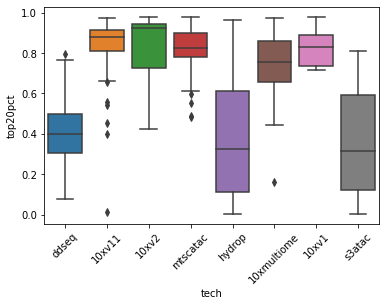

In [87]:
fig, ax = plt.subplots()
sns.boxplot(data=df_merged, y="top20pct", x="tech", ax=ax)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'ddseq'),
  Text(1, 0, '10xv11'),
  Text(2, 0, '10xv2'),
  Text(3, 0, 'mtscatac'),
  Text(4, 0, 'hydrop'),
  Text(5, 0, '10xmultiome'),
  Text(6, 0, '10xv1'),
  Text(7, 0, 's3atac')])

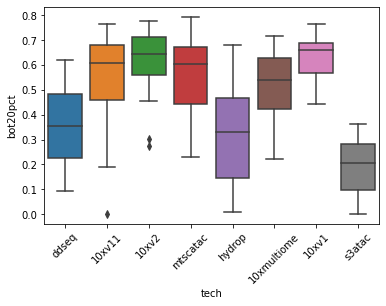

In [88]:
fig, ax = plt.subplots()
sns.boxplot(data=df_merged, y="bot20pct", x="tech")
plt.xticks(rotation=45)

In [89]:
tech_color_palette = {
    "10xv2": "#1b9e77",
    "10xv1": "#d95f02",
    "10xv11": "#7570b3",
    "10xmultiome": "#e7298a",
    "mtscatac": "#66a61e",
    "ddseq": "#e6ab02",
    "s3atac": "#a6761d",
    "hydrop": "#666666",
}

tech_alias_dict = {
    "10xmultiome": "10x Multiome",
    "10xv1": "10x v1",
    "10xv11": "10x v1.1",
    "10xv2": "10x v2",
    "ddseq": "ddSEQ SureCell",
    "hydrop": "HyDrop",
    "mtscatac": "mtscATAC-seq",
    "s3atac": "s3-ATAC",
}


tech_alias_order = [
    "10x v1",
    "10x v1.1",
    "10x v2",
    "10x Multiome",
    "mtscATAC-seq",
    "ddSEQ SureCell",
    "s3-ATAC",
    "HyDrop",
]

tech_alias_color_palette = {
    tech_alias_dict[x]: tech_color_palette[x] for x in tech_color_palette.keys()
}

In [90]:
df_sub1 = pd.DataFrame()
df_sub1["Percentage Recovered"] = df_merged["top20pct"]
df_sub1["sample"] = df_merged["sample"]
df_sub1["cell_type"] = df_merged["cell_type"]
df_sub1["Percentile"] = "Top 20% DARs"

df_sub2 = pd.DataFrame()
df_sub2["Percentage Recovered"] = df_merged["bot20pct"]
df_sub2["sample"] = df_merged["sample"]
df_sub2["cell_type"] = df_merged["cell_type"]
df_sub2["Percentile"] = "Bottom 20% DARs"

df_merged_stack_dars = pd.concat([df_sub1, df_sub2])

In [91]:
df_merged_stack_dars["Technology"] = [
    tech_alias_dict[x.split("_")[1]] for x in df_merged_stack_dars.index
]
df_merged_stack_dars.reset_index(inplace=True, drop=True)

Text(0.5, 1.0, 'DAR Recovery')

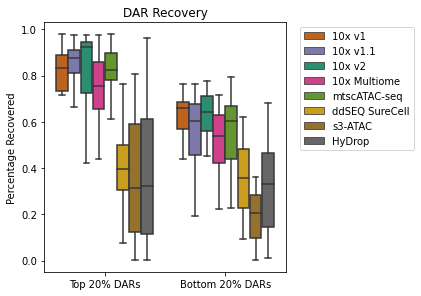

In [92]:
fig, ax = plt.subplots()
sns.boxplot(
    df_merged_stack_dars,
    y="Percentage Recovered",
    x="Percentile",
    hue="Technology",
    showfliers=False,
    hue_order=tech_alias_order,
    palette=tech_alias_color_palette,
    ax=ax,
)
plt.xticks(rotation=0, ha="center")
plt.xlabel(None)
lgd = plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.tight_layout()
plt.savefig("plts_final/DARs_recovery.png", dpi=600, facecolor="white")
plt.savefig("plts_final/DARs_recovery.svg", dpi=600, facecolor="white")
plt.title("DAR Recovery")

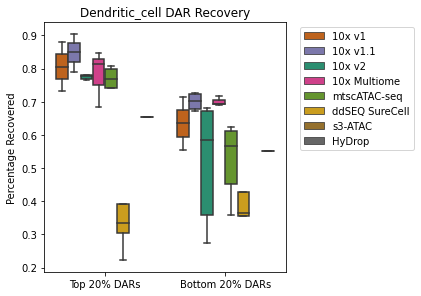

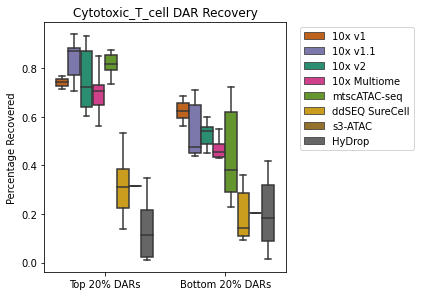

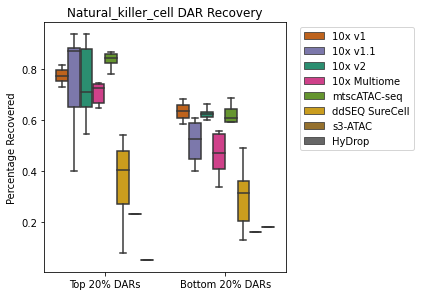

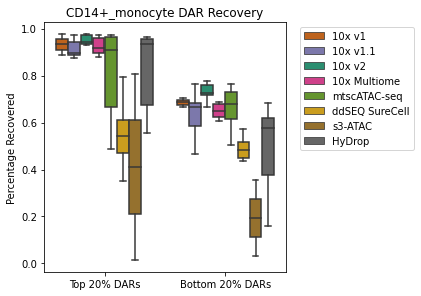

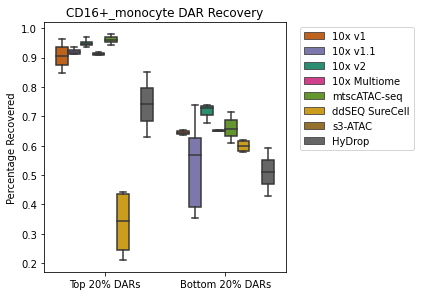

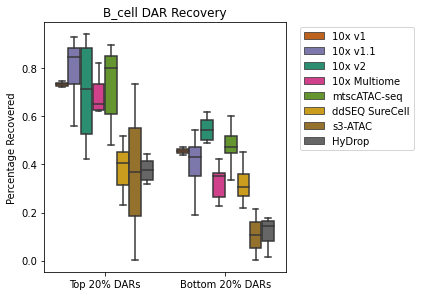

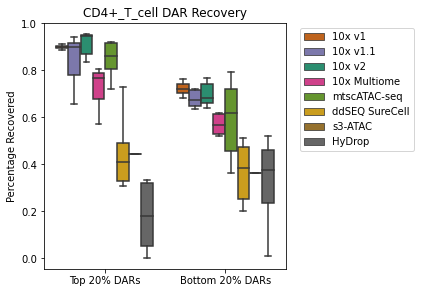

In [93]:
for cell_type in df_merged_stack_dars["cell_type"].unique():
    df_tmp = df_merged_stack_dars[df_merged_stack_dars["cell_type"] == cell_type]

    fig, ax = plt.subplots()
    sns.boxplot(
        df_tmp,
        y="Percentage Recovered",
        x="Percentile",
        hue="Technology",
        showfliers=False,
        hue_order=tech_alias_order,
        palette=tech_alias_color_palette,
        ax=ax,
    )
    plt.xticks(rotation=0, ha="center")
    plt.xlabel(None)
    lgd = plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
    plt.tight_layout()
    plt.savefig(f"plts_final/DARs_recovery_{cell_type}.png", dpi=600, facecolor="white")
    plt.savefig(f"plts_final/DARs_recovery_{cell_type}.svg", dpi=600, facecolor="white")
    plt.title(f"{cell_type} DAR Recovery")

In [94]:
df_merged_stack_dars

,Percentage Recovered,sample,cell_type,Percentile,Technology
0,0.334588,BIO_ddseq_1,Dendritic_cell,Top 20% DARs,ddSEQ SureCell
1,0.905061,CNA_10xv11_3,Dendritic_cell,Top 20% DARs,10x v1.1
2,0.829569,CNA_10xv11_5,Dendritic_cell,Top 20% DARs,10x v1.1
3,0.861355,CNA_10xv2_1,Dendritic_cell,Top 20% DARs,10x v2
4,0.775408,CNA_10xv2_2,Dendritic_cell,Top 20% DARs,10x v2
...,...,...,...,...,...
535,0.735619,BRO_mtscatac_2,CD4+_T_cell,Bottom 20% DARs,mtscATAC-seq
536,0.600813,CNA_10xmultiome_1,CD4+_T_cell,Bottom 20% DARs,10x Multiome
537,0.525276,CNA_10xmultiome_2,CD4+_T_cell,Bottom 20% DARs,10x Multiome
538,0.722836,CNA_10xv11_1,CD4+_T_cell,Bottom 20% DARs,10x v1.1


# for peaks

In [95]:
sorted(glob.glob("upset_mergepeaks/*top20*peaks*count.matrix*"))

['upset_mergepeaks/BIO_ddseq_1__top20pct_peaks_matrix.txt.count.matrix.txt',
 'upset_mergepeaks/BIO_ddseq_2__top20pct_peaks_matrix.txt.count.matrix.txt',
 'upset_mergepeaks/BIO_ddseq_3__top20pct_peaks_matrix.txt.count.matrix.txt',
 'upset_mergepeaks/BIO_ddseq_4__top20pct_peaks_matrix.txt.count.matrix.txt',
 'upset_mergepeaks/BRO_mtscatac_1__top20pct_peaks_matrix.txt.count.matrix.txt',
 'upset_mergepeaks/BRO_mtscatac_2__top20pct_peaks_matrix.txt.count.matrix.txt',
 'upset_mergepeaks/CNA_10xmultiome_1__top20pct_peaks_matrix.txt.count.matrix.txt',
 'upset_mergepeaks/CNA_10xmultiome_2__top20pct_peaks_matrix.txt.count.matrix.txt',
 'upset_mergepeaks/CNA_10xv11_1__top20pct_peaks_matrix.txt.count.matrix.txt',
 'upset_mergepeaks/CNA_10xv11_2__top20pct_peaks_matrix.txt.count.matrix.txt',
 'upset_mergepeaks/CNA_10xv11_3__top20pct_peaks_matrix.txt.count.matrix.txt',
 'upset_mergepeaks/CNA_10xv11_4__top20pct_peaks_matrix.txt.count.matrix.txt',
 'upset_mergepeaks/CNA_10xv11_5__top20pct_peaks_matrix

In [96]:
df_merged = pd.DataFrame(columns=["top20pct", "bot20pct"])
for matrix_path in sorted(glob.glob("upset_mergepeaks/*top20*peaks*count.matrix*")):
    print(matrix_path)
    sample = matrix_path.split("/")[-1].split("__")[0]

    df = pd.read_csv(matrix_path, sep="\t", index_col=0)
    df.columns = [f"merged", f"{sample}"]
    df.index = [f"merged", f"{sample}"]

    ratio_found = df.at[f"{sample}", f"merged"] / df.at[f"{sample}", f"{sample}"]

    df_merged.at[f"{sample}", "top20pct"] = ratio_found


for matrix_path in sorted(glob.glob("upset_mergepeaks/*bot20*peaks*count.matrix*")):
    print(matrix_path)
    sample = matrix_path.split("/")[-1].split("__")[0]

    df = pd.read_csv(matrix_path, sep="\t", index_col=0)
    df.columns = [f"merged", f"{sample}"]
    df.index = [f"merged", f"{sample}"]

    ratio_found = df.at[f"{sample}", f"merged"] / df.at[f"{sample}", f"{sample}"]

    df_merged.at[f"{sample}", "bot20pct"] = ratio_found

df_merged["sample"] = [x.split("__")[0] for x in df_merged.index]
df_merged["tech"] = [x.split("_")[1] for x in df_merged["sample"]]

upset_mergepeaks/BIO_ddseq_1__top20pct_peaks_matrix.txt.count.matrix.txt
upset_mergepeaks/BIO_ddseq_2__top20pct_peaks_matrix.txt.count.matrix.txt
upset_mergepeaks/BIO_ddseq_3__top20pct_peaks_matrix.txt.count.matrix.txt
upset_mergepeaks/BIO_ddseq_4__top20pct_peaks_matrix.txt.count.matrix.txt
upset_mergepeaks/BRO_mtscatac_1__top20pct_peaks_matrix.txt.count.matrix.txt
upset_mergepeaks/BRO_mtscatac_2__top20pct_peaks_matrix.txt.count.matrix.txt
upset_mergepeaks/CNA_10xmultiome_1__top20pct_peaks_matrix.txt.count.matrix.txt
upset_mergepeaks/CNA_10xmultiome_2__top20pct_peaks_matrix.txt.count.matrix.txt
upset_mergepeaks/CNA_10xv11_1__top20pct_peaks_matrix.txt.count.matrix.txt
upset_mergepeaks/CNA_10xv11_2__top20pct_peaks_matrix.txt.count.matrix.txt
upset_mergepeaks/CNA_10xv11_3__top20pct_peaks_matrix.txt.count.matrix.txt
upset_mergepeaks/CNA_10xv11_4__top20pct_peaks_matrix.txt.count.matrix.txt
upset_mergepeaks/CNA_10xv11_5__top20pct_peaks_matrix.txt.count.matrix.txt
upset_mergepeaks/CNA_10xv2_1

In [97]:
df_merged

,top20pct,bot20pct,sample,tech
BIO_ddseq_1,0.832469,0.077207,BIO_ddseq_1,ddseq
BIO_ddseq_2,0.830997,0.085911,BIO_ddseq_2,ddseq
BIO_ddseq_3,0.89662,0.113484,BIO_ddseq_3,ddseq
BIO_ddseq_4,0.888921,0.090041,BIO_ddseq_4,ddseq
BRO_mtscatac_1,0.980615,0.110935,BRO_mtscatac_1,mtscatac
BRO_mtscatac_2,0.975646,0.093019,BRO_mtscatac_2,mtscatac
CNA_10xmultiome_1,0.97169,0.105992,CNA_10xmultiome_1,10xmultiome
CNA_10xmultiome_2,0.961905,0.100496,CNA_10xmultiome_2,10xmultiome
CNA_10xv11_1,0.962841,0.096627,CNA_10xv11_1,10xv11
CNA_10xv11_2,0.96784,0.07429,CNA_10xv11_2,10xv11


In [98]:
df_sub1 = pd.DataFrame()
df_sub1["Percentage Recovered"] = df_merged["top20pct"]
df_sub1["sample"] = df_merged["sample"]
df_sub1["Percentile"] = "Top 20% Peaks"

df_sub2 = pd.DataFrame()
df_sub2["Percentage Recovered"] = df_merged["bot20pct"]
df_sub2["sample"] = df_merged["sample"]
df_sub2["Percentile"] = "Bottom 20% Peaks"

df_merged_stack_peaks = pd.concat([df_sub1, df_sub2])

In [99]:
df_merged_stack_peaks["Technology"] = [
    tech_alias_dict[x.split("_")[1]] for x in df_merged_stack_peaks.index
]
df_merged_stack_peaks.reset_index(inplace=True, drop=True)

Text(0.5, 1.0, 'Peak Recovery')

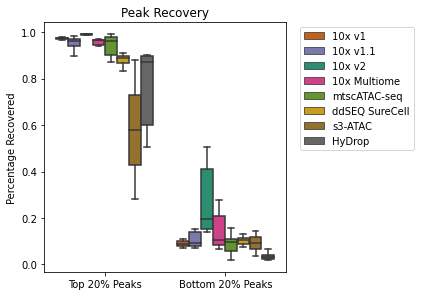

In [100]:
fig, ax = plt.subplots()
sns.boxplot(
    df_merged_stack_peaks,
    y="Percentage Recovered",
    x="Percentile",
    hue="Technology",
    showfliers=False,
    hue_order=tech_alias_order,
    palette=tech_alias_color_palette,
    ax=ax,
)
plt.xticks(rotation=0, ha="center")
plt.xlabel(None)
lgd = plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.tight_layout()
plt.savefig("plts_final/peaks_recovery.png", dpi=600, facecolor="white")
plt.savefig("plts_final/peaks_recovery.svg", dpi=600, facecolor="white")
plt.title("Peak Recovery")

### Combined figure 

In [101]:
df_merged_stack = pd.concat([df_merged_stack_dars, df_merged_stack_peaks])

In [102]:
df_merged_stack["Percentage Recovered"] = df_merged_stack["Percentage Recovered"] * 100

Text(0.5, 1.0, 'DAR/Peak Recovery')

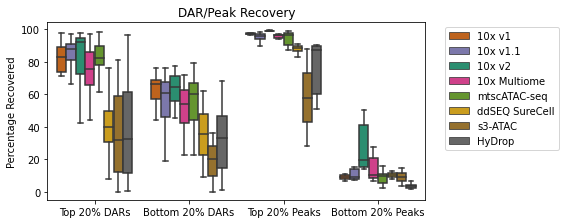

In [103]:
fig, ax = plt.subplots(figsize=(8, 3))
sns.boxplot(
    df_merged_stack,
    y="Percentage Recovered",
    x="Percentile",
    hue="Technology",
    showfliers=False,
    hue_order=tech_alias_order,
    palette=tech_alias_color_palette,
    ax=ax,
)
plt.xticks(rotation=0, ha="center")
plt.xlabel(None)
lgd = plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.tight_layout()
plt.savefig("plts_final/combined_recovery.png", dpi=600, facecolor="white")
plt.savefig("plts_final/combined_recovery.svg", dpi=600, facecolor="white")
plt.title("DAR/Peak Recovery")

In [104]:
df_merged_stack

,Percentage Recovered,sample,cell_type,Percentile,Technology
0,33.458804,BIO_ddseq_1,Dendritic_cell,Top 20% DARs,ddSEQ SureCell
1,90.506064,CNA_10xv11_3,Dendritic_cell,Top 20% DARs,10x v1.1
2,82.956922,CNA_10xv11_5,Dendritic_cell,Top 20% DARs,10x v1.1
3,86.135508,CNA_10xv2_1,Dendritic_cell,Top 20% DARs,10x v2
4,77.540778,CNA_10xv2_2,Dendritic_cell,Top 20% DARs,10x v2
...,...,...,...,...,...
89,11.076654,VIB_10xv1_2,NaN,Bottom 20% Peaks,10x v1
90,14.575433,VIB_10xv2_1,NaN,Bottom 20% Peaks,10x v2
91,13.80168,VIB_10xv2_2,NaN,Bottom 20% Peaks,10x v2
92,1.725594,VIB_hydrop_1,NaN,Bottom 20% Peaks,HyDrop


In [105]:
df_merged_stack.reset_index(inplace=True, drop=True)
df_merged_stack = df_merged_stack.fillna("nan")
df = pd.DataFrame(index=df_merged_stack["sample"].unique())
for row in df_merged_stack.index:
    # print(df_merged_stack.iloc[row])
    if df_merged_stack.iloc[row]["cell_type"] != "nan":
        df.at[
            df_merged_stack.iloc[row]["sample"],
            df_merged_stack.iloc[row]["cell_type"]
            + " "
            + df_merged_stack.iloc[row]["Percentile"],
        ] = df_merged_stack.iloc[row]["Percentage Recovered"]
    else:
        df.at[
            df_merged_stack.iloc[row]["sample"], df_merged_stack.iloc[row]["Percentile"]
        ] = df_merged_stack.iloc[row]["Percentage Recovered"]

In [106]:
import numpy as na

In [107]:
df.columns = [x + " Recovered" for x in df.columns]

In [108]:
df.to_csv("dar_peak_recovery.tsv", sep="\t")

In [109]:
df

,Dendritic_cell Top 20% DARs Recovered,Cytotoxic_T_cell Top 20% DARs Recovered,Natural_killer_cell Top 20% DARs Recovered,CD14+_monocyte Top 20% DARs Recovered,CD16+_monocyte Top 20% DARs Recovered,B_cell Top 20% DARs Recovered,CD4+_T_cell Top 20% DARs Recovered,Dendritic_cell Bottom 20% DARs Recovered,Cytotoxic_T_cell Bottom 20% DARs Recovered,Natural_killer_cell Bottom 20% DARs Recovered,CD14+_monocyte Bottom 20% DARs Recovered,CD16+_monocyte Bottom 20% DARs Recovered,B_cell Bottom 20% DARs Recovered,CD4+_T_cell Bottom 20% DARs Recovered,Top 20% Peaks Recovered,Bottom 20% Peaks Recovered
BIO_ddseq_1,33.458804,28.244681,36.016371,34.987795,NaN,24.837209,33.004067,35.633626,14.680851,22.510232,45.138324,NaN,28.232558,21.905869,83.246940,7.720650
CNA_10xv11_3,90.506064,94.308511,93.860846,93.612693,NaN,93.162791,94.363742,72.354663,68.351064,60.709413,70.565500,NaN,52.232558,71.702499,98.510873,15.209482
CNA_10xv11_5,82.956922,87.393617,89.495225,88.242474,NaN,87.627907,88.785590,68.172313,44.042553,58.185539,67.697315,NaN,45.767442,64.904126,95.765727,13.393309
CNA_10xv2_1,86.135508,91.861702,93.587995,93.531326,95.603041,94.372093,95.119117,68.046842,56.010638,60.163711,66.781937,69.570577,56.465116,68.332365,99.087507,16.525170
CNA_10xv2_2,77.540778,93.404255,92.974079,95.341741,97.061845,93.534884,94.479954,30.363864,53.457447,62.278308,71.684296,67.721389,52.511628,68.448576,99.289943,22.214717
CNA_mtscatac_2,61.271435,73.723404,78.171896,59.886086,NaN,82.232558,72.225450,56.545379,27.659574,33.765348,50.508544,NaN,33.720930,36.548518,87.177560,4.375393
BIO_ddseq_2,30.405688,23.936170,32.196453,39.991863,NaN,23.116279,30.621732,36.574655,13.670213,30.832196,43.795769,NaN,29.488372,20.337013,83.099715,8.591123
EPF_hydrop_3,65.474697,19.574468,NaN,95.667209,85.021574,37.627907,33.585125,55.102468,40.159574,NaN,68.185517,59.174029,10.465116,52.237071,88.608410,4.243364
HAR_ddseq_1,39.167712,34.308511,45.770805,49.247356,20.936922,45.023256,44.625218,42.701798,27.180851,32.060027,50.040683,58.372714,31.906977,30.447414,88.471920,12.961911
MDC_mtscatac_1,79.799247,80.478723,86.562074,94.894223,94.246969,85.953488,92.271935,35.800920,43.138298,59.345157,76.301871,71.625231,60.232558,66.995933,99.027697,15.825107
